In [3]:
from ultralytics import YOLO

import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Используем устройство:", DEVICE)

Используем устройство: cuda


In [8]:
model = YOLO("yolo11m.pt") # model

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fareselmenshawii/face-detection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'face-detection-dataset' dataset.
Path to dataset files: /kaggle/input/face-detection-dataset


In [9]:
import os
print(os.listdir())

['.config', 'yolo11m.pt', 'sample_data']


In [12]:
model.train(
    data="/content/face_detection_data.yaml",
    epochs=20,
    imgsz=416,
    batch=16,
    device=DEVICE,
)

engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/face_detection_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8d9e753710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


0: 256x416 12 Faces, 16.1ms
Speed: 1.3ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 416)


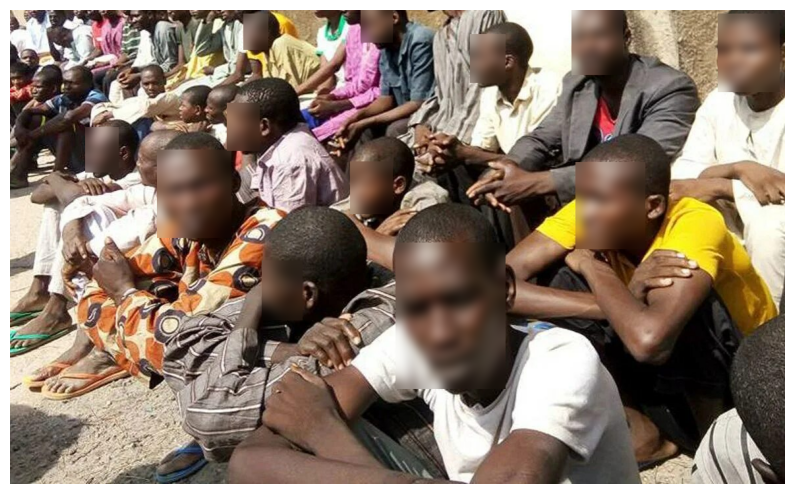

In [23]:
import requests
import cv2
import numpy as np
from ultralytics import YOLO
from matplotlib import pyplot as plt

# -----------------------------
# Настройки
# -----------------------------
MODEL_PATH = "/content/runs/detect/train2/weights/best.pt"  # путь к лучшей модели
IMAGE_URL = "https://avatars.mds.yandex.net/i?id=967f5b0f63c755817aaed89ff20ed53c_l-4904220-images-thumbs&ref=rim&n=13&w=1176&h=720"
OUTPUT_IMAGE = "blurred_from_url.jpg"
BLUR_KERNEL = (51, 51)
DEVICE = "cuda:0"  # или "cpu"

# -----------------------------
# Загружаем модель
# -----------------------------
model = YOLO(MODEL_PATH)

# -----------------------------
# Функция блюра и отображения
# -----------------------------
def blur_faces_from_url_show(url):
    # Загружаем изображение по ссылке
    resp = requests.get(url)
    image_array = np.frombuffer(resp.content, np.uint8)
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Детекция лиц
    results = model.predict(img, device=DEVICE)

    # Блюрим найденные лица
    for r in results:
        for box in r.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box)
            roi = img[y1:y2, x1:x2]
            roi = cv2.GaussianBlur(roi, BLUR_KERNEL, 0)
            img[y1:y2, x1:x2] = roi

    # Переводим BGR → RGB для отображения через matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Показываем изображение в Colab
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# -----------------------------
# Запуск
# -----------------------------
blur_faces_from_url_show(IMAGE_URL)

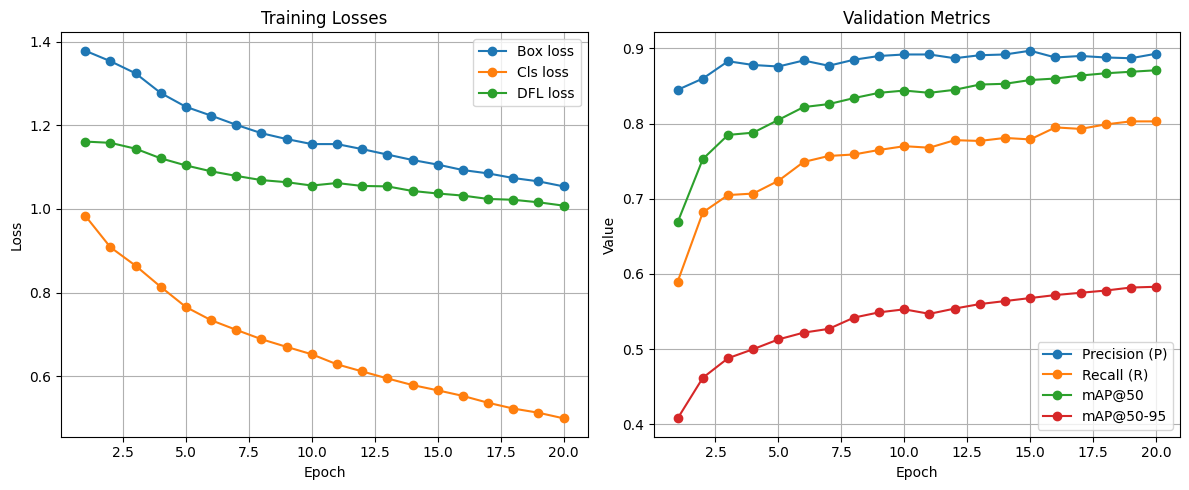

In [13]:
import matplotlib.pyplot as plt

# Эпохи
epochs = list(range(1, 21))

# Лоссы
box_loss = [1.378, 1.353, 1.324, 1.277, 1.244, 1.223, 1.201, 1.181, 1.167,
            1.155, 1.155, 1.143, 1.130, 1.117, 1.106, 1.093, 1.085, 1.074, 1.066, 1.054]

cls_loss = [0.984, 0.9087, 0.8646, 0.814, 0.7659, 0.7344, 0.7113, 0.689, 0.6707,
            0.653, 0.629, 0.6121, 0.5953, 0.5795, 0.5669, 0.5536, 0.5372, 0.5234, 0.5134, 0.500]

dfl_loss = [1.161, 1.158, 1.144, 1.121, 1.104, 1.090, 1.079, 1.069, 1.064,
            1.056, 1.062, 1.055, 1.054, 1.043, 1.037, 1.032, 1.024, 1.022, 1.016, 1.008]

# Метрики
precision = [0.845, 0.860, 0.883, 0.878, 0.876, 0.884, 0.877, 0.885, 0.890,
             0.892, 0.892, 0.887, 0.891, 0.892, 0.897, 0.888, 0.890, 0.888, 0.887, 0.893]

recall    = [0.590, 0.682, 0.705, 0.707, 0.724, 0.749, 0.757, 0.759, 0.765,
             0.770, 0.768, 0.778, 0.777, 0.781, 0.779, 0.795, 0.793, 0.799, 0.803, 0.803]

map50     = [0.669, 0.753, 0.785, 0.788, 0.805, 0.822, 0.826, 0.834, 0.841,
             0.844, 0.841, 0.845, 0.852, 0.853, 0.858, 0.860, 0.864, 0.867, 0.869, 0.871]

map5095   = [0.408, 0.462, 0.488, 0.500, 0.513, 0.522, 0.527, 0.542, 0.549,
             0.553, 0.547, 0.554, 0.560, 0.564, 0.568, 0.572, 0.575, 0.578, 0.582, 0.583]

# --- Графики ---
plt.figure(figsize=(12, 5))

# Лоссы
plt.subplot(1, 2, 1)
plt.plot(epochs, box_loss, label="Box loss", marker="o")
plt.plot(epochs, cls_loss, label="Cls loss", marker="o")
plt.plot(epochs, dfl_loss, label="DFL loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Losses")
plt.legend()
plt.grid(True)

# Метрики
plt.subplot(1, 2, 2)
plt.plot(epochs, precision, label="Precision (P)", marker="o")
plt.plot(epochs, recall, label="Recall (R)", marker="o")
plt.plot(epochs, map50, label="mAP@50", marker="o")
plt.plot(epochs, map5095, label="mAP@50-95", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Validation Metrics")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
from google.colab import files

# Скачиваем
files.download("/content/runs/detect/train2/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>